In [107]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [108]:
dropbox_root = Path('D:\\Dropbox')
root_dir = dropbox_root.joinpath('1_Academics','Research','22-TEGS_modelling','TEGS GenX shared folder','GenX_runs')

In [109]:
# TEGS
target_run = root_dir.joinpath('outputs','newEngland','temp_lossrate_sweep_stor2_v2','0.01_2400.0_3.0_stor2')
tech_header = "TEGS"
eff_up = 0.99
eff_down = 0.5

# Li-ion
# target_run = root_dir.joinpath('outputs','newEngland','emissions_and_baseline_v2','0.01')
# tech_header = "Liion_Moderate"
# eff_up = 0.92
# eff_down = 0.92

In [110]:
capacity = pd.read_csv(target_run.joinpath('capacity.csv'), index_col=0)
capacity

,Zone,StartCap,RetCap,NewCap,EndCap,StartEnergyCap,RetEnergyCap,NewEnergyCap,EndEnergyCap,StartChargeCap,RetChargeCap,NewChargeCap,EndChargeCap
Resource,,,,,,,,,,,,,
NENGREST_biomass_1,1.0,0,0.0,884.588926,884.588926,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_conventional_hydroelectric_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_hydroelectric_pumped_storage_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCAvgCF_Moderate,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CTAvgCF_Moderate,1.0,0,0.0,1636.127727,1636.127727,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCCCSAvgCF_Moderate,1.0,0,0.0,2118.312574,2118.312574,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NaturalGas_CCS100_Moderate,1.0,0,0.0,5885.290049,5885.290049,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
NENGREST_nuclear_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
OffShoreWind_Class3_Moderate_fixed_1,1.0,0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [111]:
discharge = pd.read_csv(target_run.joinpath('power.csv'), index_col="Resource")
discharge.drop(index=["Zone", "AnnualSum"], inplace=True)
discharge.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS,Total
Resource,,,,,,,,,,,,,,
t1,884.588926,0.0,0.0,0.0,0.0,0.0,5214.224828,0.0,0.0,9593.728442,0.0,0.0,0.0,15692.542196
t2,884.588926,0.0,0.0,0.0,0.0,0.0,4880.358870,0.0,0.0,9425.594400,0.0,0.0,0.0,15190.542196
t3,884.588926,0.0,0.0,0.0,0.0,0.0,4233.300382,0.0,0.0,9699.652888,0.0,0.0,0.0,14817.542196
t4,884.588926,0.0,0.0,0.0,0.0,0.0,5378.603335,0.0,0.0,8366.349934,0.0,0.0,0.0,14629.542196
t5,884.588926,0.0,0.0,0.0,0.0,0.0,5885.290049,0.0,0.0,6516.875471,0.0,0.0,0.0,13286.754447


In [112]:
charge = pd.read_csv(target_run.joinpath('charge.csv'), index_col=0)
charge.drop(index=["Zone", "AnnualSum"], inplace=True)
charge.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS,Total
Resource,,,,,,,,,,,,,,
t1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6458.542196,6458.542196
t5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5144.754447,5144.754447


In [113]:
storage = pd.read_csv(target_run.joinpath('storage.csv'), index_col=0)
storage.drop(index=["Zone"], inplace=True)
storage.head()

,NENGREST_biomass_1,NENGREST_conventional_hydroelectric_1,NENGREST_hydroelectric_pumped_storage_1,NaturalGas_CCAvgCF_Moderate,NaturalGas_CTAvgCF_Moderate,NaturalGas_CCCCSAvgCF_Moderate,NaturalGas_CCS100_Moderate,NENGREST_nuclear_1,OffShoreWind_Class3_Moderate_fixed_1,LandbasedWind_Class3_Moderate_130,UtilityPV_Class1_Moderate_100_0.2,Liion_Moderate,TEGS
Resource,,,,,,,,,,,,,
t1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28668.355564
t2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35026.476893
t3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41376.650571
t4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47718.886532
t5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52752.544825


In [114]:
tegs_data = {
    "storage": storage.loc[:,tech_header],
    "charge": charge.loc[:,tech_header],
    "discharge": discharge.loc[:,tech_header]
}
tegs_df = pd.DataFrame(tegs_data)
# Make the index run from 1 -> 8760
tegs_df.set_index(np.arange(1,8761), inplace=True)
tegs_df.head()

,storage,charge,discharge
1,28668.355564,6458.542196,0.0
2,35026.476893,6458.542196,0.0
3,41376.650571,6458.542196,0.0
4,47718.886532,6458.542196,0.0
5,52752.544825,5144.754447,0.0


We want to find the time that a MWh is stored in TEGS before use

We'll assume that the oldest MWh is discharged first

We'll use a simple approach and just sweep through the timeseries, rather than a more sophisticated vectorized approach

In [115]:
print(tegs_df.loc[114])
print(tegs_df['discharge'].loc[114])

storage         0.000000
charge          0.000000
discharge    1215.380692
Name: 114, dtype: float64
1215.3806922032995


In [116]:
# Find the first index where the storage is 0
first_zero = tegs_df[tegs_df["storage"] == 0].index[0] + 1
print(first_zero)

# To avoid the need to consider looping, we'll temporarily remake the TEGS data, starting from the first zero
tegs_charge =  np.concatenate((tegs_df["charge"].loc[first_zero:].values, tegs_df["charge"].loc[:first_zero].values))
tegs_discharge = np.concatenate((tegs_df["discharge"].loc[first_zero:].values, tegs_df["discharge"].loc[:first_zero].values))
tegs_storage = np.concatenate((tegs_df["storage"].loc[first_zero:].values, tegs_df["storage"].loc[:first_zero].values))

107


In [117]:
num_hours = 8760

stor_record = np.zeros([num_hours,2])
discharge_record = np.zeros([num_hours,num_hours])
dwell_time = np.zeros(num_hours)

tol = 1e-3

# Remember the df is indexed from 1 -> 8760
for t in range(8760):
    stored_energy = tegs_charge[t] * eff_up # Charge and discharge will never both be non-zero
    stor_record[t,0] = stored_energy # Amount charged in that hour
    stor_record[t,1] = stored_energy # Current tally of energy stored in hour t

    discharged_energy = tegs_discharge[t] / eff_down

    while discharged_energy > tol:
        t_0 = np.where(stor_record[:(t),1] > 0)[0][0] # Hour when the energy was stored
        used_energy = min(discharged_energy, stor_record[t_0,1]) # Amount of energy used in hour t from hour t_0
        stor_record[t_0,1] -= used_energy # Reduce the tally of the energy charged in hour t_0
        discharge_record[t_0,t] += used_energy # Amount of energy discharged in hour t from hour t_0
        dwell_time[(t - t_0)%num_hours] += used_energy # Tally the time spent in storage
        discharged_energy -= used_energy # Reduce the amount of energy left to discharge
        # print(f'time: {t}, time_0: {t_0}, delta: {((t-1) - t_0)%num_hours}')


# for i in np.arange(first_zero - 1, first_zero + num_hours):
#     t = i % num_hours + 1
#     print(t)
#     stored_energy = tegs_df["charge"][t] * eff_up # Charge and discharge will never both be non-zero
#     stor_record[t - 1,0] = stored_energy # Amount charged in that hour
#     stor_record[t - 1,1] = stored_energy # Current tally of energy stored in hour t

#     discharged_energy = tegs_df["discharge"][(t)%num_hours+1] / eff_down
#     counter = np.copy(discharged_energy)
#     while counter > 0:
#         # We want to find the oldest available energy
#         # That energy will normally come from an earlier hour, but it could 
#             # Check ahead first
#         idx_behind = np.where(stor_record[t-1:,1] > 0)[0]
#         idx_ahead = np.where(stor_record[:t-1,1] > 0)[0]
#         if len(idx_ahead) == 0:
#             t_0 = idx_behind[-1]
#         elif len(idx_behind) == 0:
#             t_0 = idx_ahead[0]
#         else:
#             t_0 = np.max([idx_ahead[0], idx_behind[-1]]) # Hour when the energy was stored
#         # t_0 = np.where(stor_record[-(t-1):(t-1),1] > 0)[0][0] # Hour when the energy was stored
#         used_energy = min(counter, stor_record[t_0,1]) # Amount of energy used in hour t from hour t_0
#         stor_record[t_0,1] -= used_energy # Reduce the tally of the energy charged in hour t_0
#         discharge_record[t_0,t-1] += used_energy # Amount of energy discharged in hour t from hour t_0
#         dwell_time[((t-1) - t_0)%num_hours] += used_energy # Tally the time spent in storage
#         counter -= used_energy # Reduce the amount of energy left to discharge
#         # print(f'time: {t}, time_0: {t_0}, delta: {((t-1) - t_0)%num_hours}')


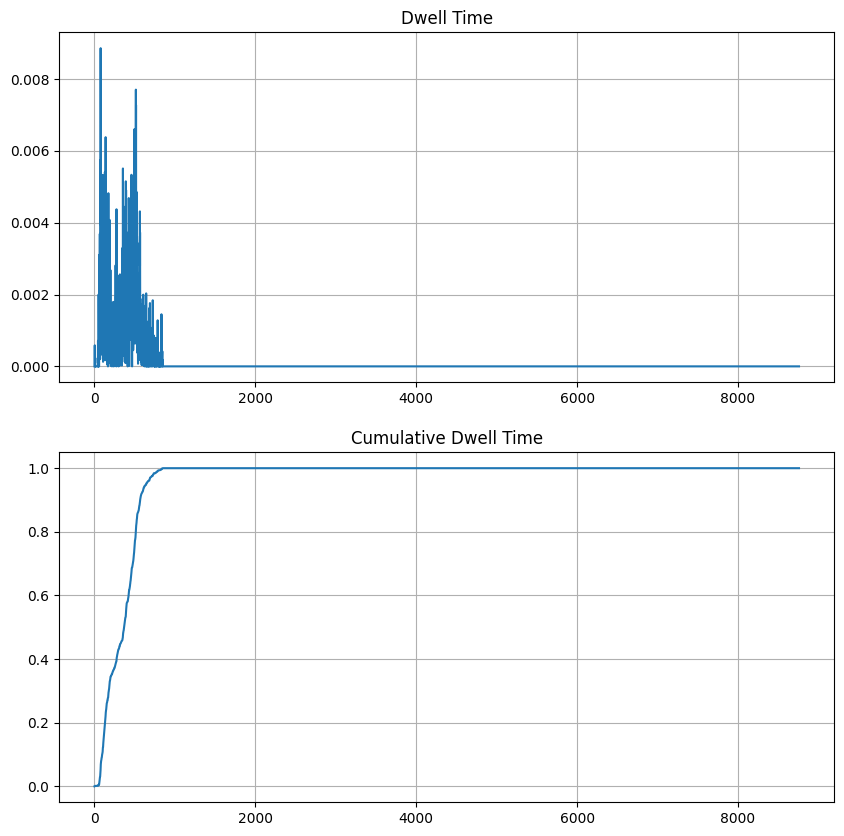

In [122]:
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].plot(dwell_time/np.sum(dwell_time))
ax[0].set_title("Dwell Time")
ax[1].plot(np.cumsum(dwell_time)/np.sum(dwell_time))
ax[1].set_title("Cumulative Dwell Time")
for a in ax:
    # a.set_xlim(0,1000)
    a.grid(True)

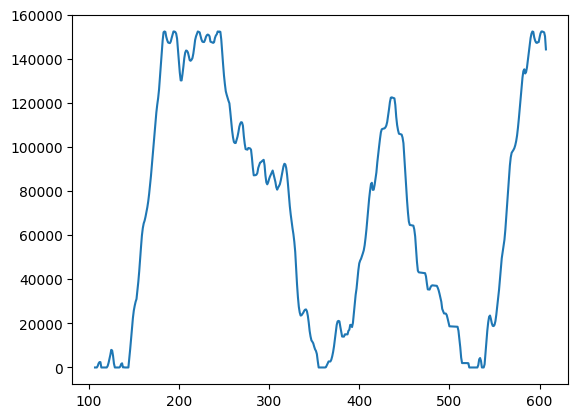

In [119]:
t_1 = first_zero
t_2 = t_1 + 500
plt.plot(np.arange(t_1, t_2+1), tegs_df.loc[t_1:t_2, "storage"], label="Storage")